## Exploring the F1 Dataset

- This dataset contains up to date information (updated via API) about F1 races from 1950 till 2021 (the most recent race being the Qatar Grand Prix)
- The dataset contains 13 CSV files each containing detailed information about each race and performance of each driver and team.
- I've tried exploring this dataset and made a couple of visualizations that made sense to me. The next steps would be to add interactivity to all the graphs and generate further visualizations, giving us more insignt on the dataset.
- I've added comments wherever possible - this helps my thought process and also anyone else who might view this notebook get a better understanding of what I'm trying to achieve.

Link: http://ergast.com/mrd/db/

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

data_path = "./data"

In [2]:
# List all available data files
for file in os.listdir(data_path):
    print(file)

circuits.csv
status.csv
lap_times.csv
drivers.csv
races.csv
constructors.csv
constructor_standings.csv
qualifying.csv
driver_standings.csv
constructor_results.csv
pit_stops.csv
seasons.csv
results.csv


In [3]:
# Dataset Exploration
# List all the columns in each file

files_and_columns = {}
for file in os.listdir(data_path):
    df = pd.read_csv(os.path.join(data_path, file))
    files_and_columns[file] = list(df.columns)

In [4]:
files_and_columns

{'circuits.csv': ['circuitId',
  'circuitRef',
  'name',
  'location',
  'country',
  'lat',
  'lng',
  'alt',
  'url'],
 'status.csv': ['statusId', 'status'],
 'lap_times.csv': ['raceId',
  'driverId',
  'lap',
  'position',
  'time',
  'milliseconds'],
 'drivers.csv': ['driverId',
  'driverRef',
  'number',
  'code',
  'forename',
  'surname',
  'dob',
  'nationality',
  'url'],
 'races.csv': ['raceId',
  'year',
  'round',
  'circuitId',
  'name',
  'date',
  'time',
  'url'],
 'constructors.csv': ['constructorId',
  'constructorRef',
  'name',
  'nationality',
  'url'],
 'constructor_standings.csv': ['constructorStandingsId',
  'raceId',
  'constructorId',
  'points',
  'position',
  'positionText',
  'wins'],
 'qualifying.csv': ['qualifyId',
  'raceId',
  'driverId',
  'constructorId',
  'number',
  'position',
  'q1',
  'q2',
  'q3'],
 'driver_standings.csv': ['driverStandingsId',
  'raceId',
  'driverId',
  'points',
  'position',
  'positionText',
  'wins'],
 'constructor_resul

In [5]:
df_status = pd.read_csv(os.path.join(data_path, "status.csv"))

In [6]:
df_status.head()

,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine


In [7]:
df_laptimes = pd.read_csv(os.path.join(data_path, "lap_times.csv"))

In [8]:
df_laptimes.head()

# we can see this doesn't have driver name. Next step would be to merge the driver name column to this
# to make more meaningful visualizations

,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342


In [9]:
df_drivers = pd.read_csv(os.path.join(data_path, "drivers.csv"))

In [10]:
df_drivers.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [1]:
# make a column with driver full name (merge first and last name)
df_drivers["full_name"] = ""

for i in df_drivers.index:
    df_drivers.loc[i, "full_name"] =  df_drivers.loc[i, "forename"] + " " + df_drivers.loc[i, "surname"]

NameError: name 'df_drivers' is not defined

In [12]:
df_drivers

,driverId,driverRef,number,code,forename,surname,dob,nationality,url,full_name
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,Lewis Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld,Nick Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg,Nico Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso,Fernando Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen,Heikki Kovalainen
...,...,...,...,...,...,...,...,...,...,...
848,850,pietro_fittipaldi,51,FIT,Pietro,Fittipaldi,1996-06-25,Brazilian,http://en.wikipedia.org/wiki/Pietro_Fittipaldi,Pietro Fittipaldi
849,851,aitken,89,AIT,Jack,Aitken,1995-09-23,British,http://en.wikipedia.org/wiki/Jack_Aitken,Jack Aitken
850,852,tsunoda,22,TSU,Yuki,Tsunoda,2000-05-11,Japanese,http://en.wikipedia.org/wiki/Yuki_Tsunoda,Yuki Tsunoda
851,853,mazepin,9,MAZ,Nikita,Mazepin,1999-03-02,Russian,http://en.wikipedia.org/wiki/Nikita_Mazepin,Nikita Mazepin


In [13]:
# merge full name with lap times according to driver id
df_drivernames = df_drivers[["driverId", "full_name"]]
df_laptimes = df_laptimes.merge(df_drivernames, on="driverId")

In [14]:
# merge race names with lap times according to race id
df_races = pd.read_csv(os.path.join(data_path, "races.csv"))
df_races.head()

,raceId,year,round,circuitId,name,date,time,url
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...


In [15]:
df_laptimes = df_laptimes.merge(df_races[["raceId", "name", "year"]], on="raceId")

In [16]:
df_laptimes.head()

,raceId,driverId,lap,position,time,milliseconds,full_name,name,year
0,841,20,1,1,1:38.109,98109,Sebastian Vettel,Australian Grand Prix,2011
1,841,20,2,1,1:33.006,93006,Sebastian Vettel,Australian Grand Prix,2011
2,841,20,3,1,1:32.713,92713,Sebastian Vettel,Australian Grand Prix,2011
3,841,20,4,1,1:32.803,92803,Sebastian Vettel,Australian Grand Prix,2011
4,841,20,5,1,1:32.342,92342,Sebastian Vettel,Australian Grand Prix,2011


In [17]:
# visualizing lap times for race Australian Grand Prix for driver Sebastian Vettel in the year 2013
df_seb_2013_au = df_laptimes[df_laptimes["full_name"] == "Sebastian Vettel"]

In [18]:
df_seb_2013_au = df_seb_2013_au[df_seb_2013_au["year"] == 2013]
df_seb_2013_au = df_seb_2013_au[df_seb_2013_au["name"] == "Australian Grand Prix"]

In [19]:
df_seb_2013_au.head()

,raceId,driverId,lap,position,time,milliseconds,full_name,name,year
50440,880,20,1,1,1:39.646,99646,Sebastian Vettel,Australian Grand Prix,2013
50441,880,20,2,1,1:33.106,93106,Sebastian Vettel,Australian Grand Prix,2013
50442,880,20,3,1,1:33.550,93550,Sebastian Vettel,Australian Grand Prix,2013
50443,880,20,4,1,1:34.374,94374,Sebastian Vettel,Australian Grand Prix,2013
50444,880,20,5,1,1:34.496,94496,Sebastian Vettel,Australian Grand Prix,2013


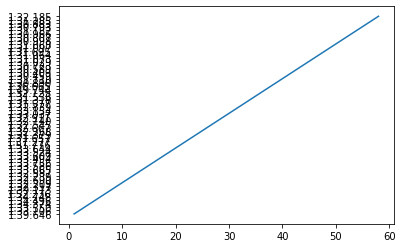

In [20]:
# visualizing lap times
# x-axis: lap number
# y-axis: lap times

plt.plot(df_seb_2013_au["lap"], df_seb_2013_au["time"])

In [21]:
# change time to timestamp
df_seb_2013_au['timestamp'] = df_seb_2013_au["time"].apply(lambda x: pd.Timestamp(x).time())
df_seb_2013_au.head()

,raceId,driverId,lap,position,time,milliseconds,full_name,name,year,timestamp
50440,880,20,1,1,1:39.646,99646,Sebastian Vettel,Australian Grand Prix,2013,01:39:38
50441,880,20,2,1,1:33.106,93106,Sebastian Vettel,Australian Grand Prix,2013,01:33:06
50442,880,20,3,1,1:33.550,93550,Sebastian Vettel,Australian Grand Prix,2013,01:33:33
50443,880,20,4,1,1:34.374,94374,Sebastian Vettel,Australian Grand Prix,2013,01:34:22
50444,880,20,5,1,1:34.496,94496,Sebastian Vettel,Australian Grand Prix,2013,01:34:29


In [22]:
plt.plot_time(df_seb_2013_au["lap"], df_seb_2013_au["timestamp"])

AttributeError: module 'matplotlib.pyplot' has no attribute 'plot_time'

In [23]:
datetime.strptime('1:39.646', '%M:%S.%f').time()

datetime.time(0, 1, 39, 646000)

In [24]:
df_seb_2013_au['timestamp'] = df_seb_2013_au["time"].apply(lambda x: datetime.strptime(x, '%M:%S.%f'))
df_seb_2013_au.head()

,raceId,driverId,lap,position,time,milliseconds,full_name,name,year,timestamp
50440,880,20,1,1,1:39.646,99646,Sebastian Vettel,Australian Grand Prix,2013,1900-01-01 00:01:39.646
50441,880,20,2,1,1:33.106,93106,Sebastian Vettel,Australian Grand Prix,2013,1900-01-01 00:01:33.106
50442,880,20,3,1,1:33.550,93550,Sebastian Vettel,Australian Grand Prix,2013,1900-01-01 00:01:33.550
50443,880,20,4,1,1:34.374,94374,Sebastian Vettel,Australian Grand Prix,2013,1900-01-01 00:01:34.374
50444,880,20,5,1,1:34.496,94496,Sebastian Vettel,Australian Grand Prix,2013,1900-01-01 00:01:34.496


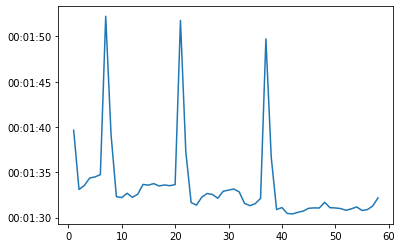

In [25]:
plt.plot(df_seb_2013_au["lap"], df_seb_2013_au["timestamp"])

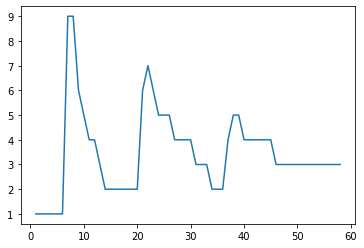

In [26]:
plt.plot(df_seb_2013_au["lap"], df_seb_2013_au["position"])

In [27]:
# make ipywidgets - select year, race and driver
#using ipywidgets
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

In [28]:
df_laptimes.head()

,raceId,driverId,lap,position,time,milliseconds,full_name,name,year
0,841,20,1,1,1:38.109,98109,Sebastian Vettel,Australian Grand Prix,2011
1,841,20,2,1,1:33.006,93006,Sebastian Vettel,Australian Grand Prix,2011
2,841,20,3,1,1:32.713,92713,Sebastian Vettel,Australian Grand Prix,2011
3,841,20,4,1,1:32.803,92803,Sebastian Vettel,Australian Grand Prix,2011
4,841,20,5,1,1:32.342,92342,Sebastian Vettel,Australian Grand Prix,2011


In [29]:
# select race
def select_race(df_year, race, driver):
    df_race_year = df_year[df_year['name'] == race]
    df_race_year_driver = df_race_year[df_race_year['full_name'] == driver]
    
    df_race_year_driver["timestamp"] = df_race_year_driver["time"].apply(lambda x: datetime.strptime(x, '%M:%S.%f'))
    fig, axs = plt.subplots(2,1)
    axs[0].plot(df_race_year_driver["lap"], df_race_year_driver["timestamp"])
    axs[0].set_xlabel("LAP NUMBER")
    axs[0].set_ylabel("LAP TIME")
    axs[1].plot(df_race_year_driver["lap"], df_race_year_driver["position"])
    axs[1].set_xlabel("LAP NUMBER")
    axs[1].set_ylabel("POSITION")

In [30]:
@widgets.interact(Year = df_laptimes['year'].sort_values().unique())
def choose_year(Year):
    df_laptimes_year = df_laptimes[df_laptimes['year'] == Year]
    
    # select race
    df_race_year = interactive(select_race, df_year = fixed(df_laptimes_year), race=df_laptimes_year['name'].unique(),
                              driver=df_laptimes_year['full_name'].unique())
    display(df_race_year)

interactive(children=(Dropdown(description='Year', options=(1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 20…

In [31]:
# comparing driver performance - for championship
# by year and total points scored

df_standings = pd.read_csv(os.path.join(data_path, "driver_standings.csv"))
df_standings.head()

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0


In [32]:
# merging race name and driver full name
df_standings = df_standings.merge(df_drivernames, on="driverId")

In [33]:
df_standings.head()

,driverStandingsId,raceId,driverId,points,position,positionText,wins,full_name
0,1,18,1,10.0,1,1,1,Lewis Hamilton
1,9,19,1,14.0,1,1,1,Lewis Hamilton
2,27,20,1,14.0,3,3,1,Lewis Hamilton
3,48,21,1,20.0,2,2,1,Lewis Hamilton
4,69,22,1,28.0,3,3,1,Lewis Hamilton


In [34]:
df_standings = df_standings.merge(df_races[["raceId", "name", "year"]], on="raceId")

In [35]:
df_standings.head()

,driverStandingsId,raceId,driverId,points,position,positionText,wins,full_name,name,year
0,1,18,1,10.0,1,1,1,Lewis Hamilton,Australian Grand Prix,2008
1,2,18,2,8.0,2,2,0,Nick Heidfeld,Australian Grand Prix,2008
2,3,18,3,6.0,3,3,0,Nico Rosberg,Australian Grand Prix,2008
3,4,18,4,5.0,4,4,0,Fernando Alonso,Australian Grand Prix,2008
4,5,18,5,4.0,5,5,0,Heikki Kovalainen,Australian Grand Prix,2008


In [36]:
# visualize overall points for Max Verstappen for the year 2020

df_max_2020 = df_standings[df_standings['full_name'] == "Max Verstappen"]
df_max_2020 = df_max_2020[df_max_2020['year'] == 2020]

In [37]:
df_max_2020.head()

,driverStandingsId,raceId,driverId,points,position,positionText,wins,full_name,name,year
5604,69888,1034,830,52.0,3,3,0,Max Verstappen,British Grand Prix,2020
5625,70014,1031,830,0.0,20,20,0,Max Verstappen,Austrian Grand Prix,2020
5645,69828,1032,830,15.0,6,6,0,Max Verstappen,Styrian Grand Prix,2020
5665,69868,1033,830,33.0,3,3,0,Max Verstappen,Hungarian Grand Prix,2020
5685,69909,1035,830,77.0,2,2,1,Max Verstappen,70th Anniversary Grand Prix,2020


In [38]:
# sort by raceID
df_max_2020.sort_values(by="raceId", inplace=True)

In [39]:
df_max_2020.head()

,driverStandingsId,raceId,driverId,points,position,positionText,wins,full_name,name,year
5625,70014,1031,830,0.0,20,20,0,Max Verstappen,Austrian Grand Prix,2020
5645,69828,1032,830,15.0,6,6,0,Max Verstappen,Styrian Grand Prix,2020
5665,69868,1033,830,33.0,3,3,0,Max Verstappen,Hungarian Grand Prix,2020
5604,69888,1034,830,52.0,3,3,0,Max Verstappen,British Grand Prix,2020
5685,69909,1035,830,77.0,2,2,1,Max Verstappen,70th Anniversary Grand Prix,2020


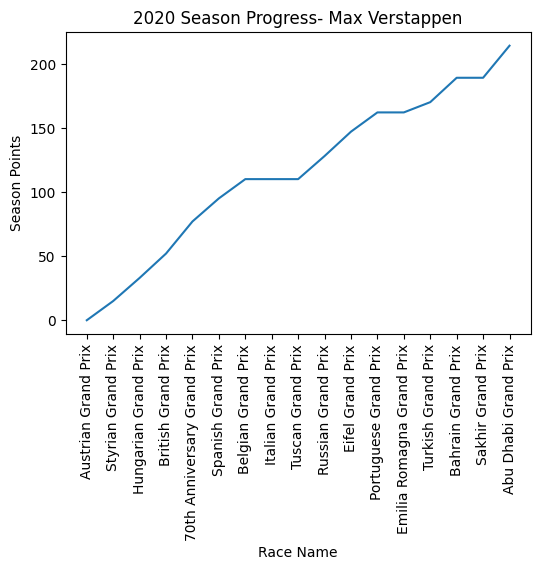

In [40]:
# visualizing
fig, ax = plt.subplots(dpi=100)
ax.plot(df_max_2020['raceId'], df_max_2020['points'])
ax.set_xticks(df_max_2020['raceId'])
ax.set_xticklabels(df_max_2020['name'], rotation=90);
ax.set_xlabel("Race Name")
ax.set_ylabel("Season Points");
ax.set_title("2020 Season Progress- Max Verstappen");

In [41]:
global year
def select_racer(df_standings_year, racer):
    df_racer_year = df_standings_year[df_standings_year['full_name']==racer]
    
    df_racer_year.sort_values(by="raceId", inplace=True)
    
    global year 
    
    fig, ax = plt.subplots(dpi=100)
    ax.plot(df_racer_year['raceId'], df_racer_year['points'])
    ax.set_xticks(df_racer_year['raceId'])
    ax.set_xticklabels(df_racer_year['name'], rotation=90);
    ax.set_xlabel("Race Name")
    ax.set_ylabel("Season Points");
    ax.set_title("{} Season Progress- {}".format(str(year), racer));

In [42]:
# making ipywidgets
@widgets.interact(Year = df_standings['year'].sort_values().unique())
def choose_year(Year):
    df_standings_year = df_standings[df_standings['year'] == Year]
    
    global year
    year = Year
    # select racer
    df_racer_year = interactive(select_racer, df_standings_year = fixed(df_standings_year), racer=df_standings_year['full_name'].unique())
    display(df_racer_year)

interactive(children=(Dropdown(description='Year', options=(1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 19…

In [43]:
# comparing two drivers performance by driver name
# for the year 2021- compare Lando Norris and Charles LeClerc
df_standings.head()

,driverStandingsId,raceId,driverId,points,position,positionText,wins,full_name,name,year
0,1,18,1,10.0,1,1,1,Lewis Hamilton,Australian Grand Prix,2008
1,2,18,2,8.0,2,2,0,Nick Heidfeld,Australian Grand Prix,2008
2,3,18,3,6.0,3,3,0,Nico Rosberg,Australian Grand Prix,2008
3,4,18,4,5.0,4,4,0,Fernando Alonso,Australian Grand Prix,2008
4,5,18,5,4.0,5,5,0,Heikki Kovalainen,Australian Grand Prix,2008


In [44]:
df_standings_2021 = df_standings[df_standings['year'] == 2021]
df_standings_2021.head()

,driverStandingsId,raceId,driverId,points,position,positionText,wins,full_name,name,year
5959,70698,1051,1,343.5,2,2,7,Lewis Hamilton,Qatar Grand Prix,2021
5960,70716,1051,4,77.0,10,10,0,Fernando Alonso,Qatar Grand Prix,2021
5961,70708,1051,8,10.0,16,16,0,Kimi Räikkönen,Qatar Grand Prix,2021
5962,70718,1051,9,0.0,20,20,0,Robert Kubica,Qatar Grand Prix,2021
5963,70712,1051,20,43.0,12,12,0,Sebastian Vettel,Qatar Grand Prix,2021


In [45]:
df_standings_2021_norris = df_standings_2021[df_standings_2021['full_name'] == "Lando Norris"]
df_standings_2021_leclerc = df_standings_2021[df_standings_2021['full_name'] == "Charles Leclerc"]

In [46]:
df_standings_2021_norris.sort_values(by="raceId", inplace=True)
df_standings_2021_leclerc.sort_values(by="raceId", inplace=True)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


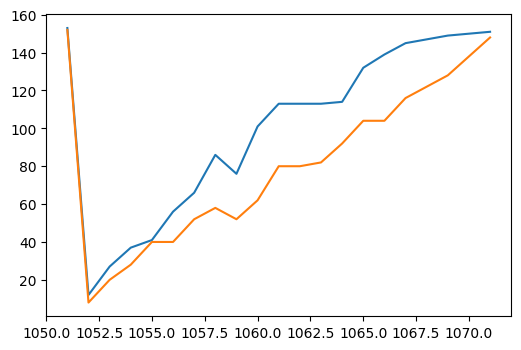

In [47]:
# visualizing
fig, ax = plt.subplots(dpi=100)
ax.plot(df_standings_2021_norris['raceId'], df_standings_2021_norris['points'])
ax.plot(df_standings_2021_leclerc['raceId'], df_standings_2021_leclerc['points'])

In [48]:
# there's something wrong with the dataset - the race ID for the latest race is set wrong
# hence we will sort by points
df_standings_2021_norris.sort_values(by="points", inplace=True)
df_standings_2021_leclerc.sort_values(by="points", inplace=True)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [49]:
# change the dataset
for i in df_standings.index:
    if df_standings.loc[i]["name"] == "Qatar Grand Prix" and df_standings.loc[i]["year"] == 2021:
        df_standings.loc[i, "raceId"] = 1072

In [50]:
df_standings_2021 = df_standings[df_standings['year'] == 2021]
df_standings_2021.head()

,driverStandingsId,raceId,driverId,points,position,positionText,wins,full_name,name,year
5959,70698,1072,1,343.5,2,2,7,Lewis Hamilton,Qatar Grand Prix,2021
5960,70716,1072,4,77.0,10,10,0,Fernando Alonso,Qatar Grand Prix,2021
5961,70708,1072,8,10.0,16,16,0,Kimi Räikkönen,Qatar Grand Prix,2021
5962,70718,1072,9,0.0,20,20,0,Robert Kubica,Qatar Grand Prix,2021
5963,70712,1072,20,43.0,12,12,0,Sebastian Vettel,Qatar Grand Prix,2021


In [51]:
df_standings_2021_norris = df_standings_2021[df_standings_2021['full_name'] == "Lando Norris"]
df_standings_2021_leclerc = df_standings_2021[df_standings_2021['full_name'] == "Charles Leclerc"]

In [52]:
df_standings_2021_norris.sort_values(by="raceId", inplace=True)
df_standings_2021_leclerc.sort_values(by="raceId", inplace=True)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [53]:
df_standings_2021_norris

,driverStandingsId,raceId,driverId,points,position,positionText,wins,full_name,name,year
5995,70234,1052,846,12.0,4,4,0,Lando Norris,Bahrain Grand Prix,2021
6015,70294,1053,846,27.0,3,3,0,Lando Norris,Emilia Romagna Grand Prix,2021
6035,70314,1054,846,37.0,3,3,0,Lando Norris,Portuguese Grand Prix,2021
6055,70334,1055,846,41.0,4,4,0,Lando Norris,Spanish Grand Prix,2021
6075,70354,1056,846,56.0,3,3,0,Lando Norris,Monaco Grand Prix,2021
6095,70374,1057,846,66.0,4,4,0,Lando Norris,Azerbaijan Grand Prix,2021
6135,70414,1058,846,86.0,4,4,0,Lando Norris,Styrian Grand Prix,2021
6115,70394,1059,846,76.0,4,4,0,Lando Norris,French Grand Prix,2021
6155,70454,1060,846,101.0,4,4,0,Lando Norris,Austrian Grand Prix,2021
6175,70474,1061,846,113.0,3,3,0,Lando Norris,British Grand Prix,2021


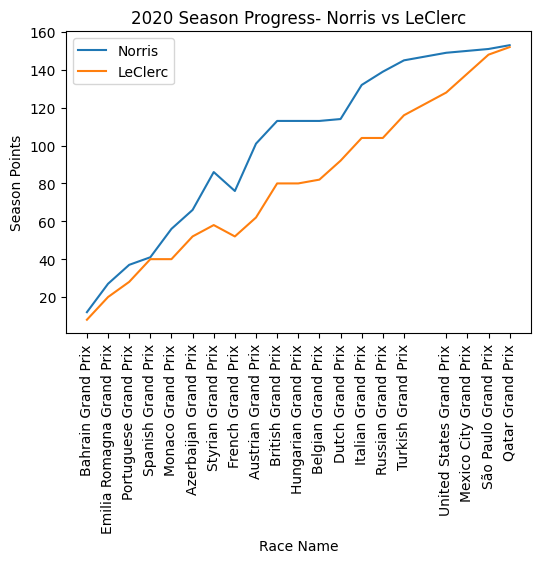

In [54]:
# visualizing
fig, ax = plt.subplots(dpi=100)
ax.plot(df_standings_2021_norris['raceId'], df_standings_2021_norris['points'], label="Norris")
ax.plot(df_standings_2021_leclerc['raceId'], df_standings_2021_leclerc['points'],label="LeClerc")
ax.set_xticks(df_standings_2021_leclerc['raceId'])
ax.set_xticklabels(df_standings_2021_leclerc['name'], rotation=90);
ax.set_xlabel("Race Name")
ax.set_ylabel("Season Points")
ax.legend()
ax.set_title("2020 Season Progress- Norris vs LeClerc");

In [55]:
# comparing driver performance of drivers in the same team
# compare driver performance for McLaren drivers
df_drivers.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url,full_name
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,Lewis Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld,Nick Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg,Nico Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso,Fernando Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen,Heikki Kovalainen


In [56]:
df_results = pd.read_csv(os.path.join(data_path, "results.csv"))

In [57]:
df_results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [58]:
# merge constructor name, driver name, race name
df_constructors = pd.read_csv(os.path.join(data_path, "constructors.csv"))

In [59]:
df_results = df_results.merge(df_constructors[['constructorId', 'name']], on='constructorId')
df_results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,name
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,McLaren
1,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1,McLaren
2,25,19,5,1,23,8,3,3,3,6.0,56,+38.450,5517005,19,7,1:35.922,208.031,1,McLaren
3,27,19,1,1,22,9,5,5,5,4.0,56,+46.548,5525103,53,3,1:35.462,209.033,1,McLaren
4,49,20,5,1,23,5,5,5,5,4.0,57,+26.789,5493759,49,1,1:33.193,209.062,1,McLaren


In [60]:
df_results = df_results.merge(df_drivers[["driverId", "full_name"]], on="driverId")
df_results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,name,full_name
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,McLaren,Lewis Hamilton
1,27,19,1,1,22,9,5,5,5,4.0,56,+46.548,5525103,53,3,1:35.462,209.033,1,McLaren,Lewis Hamilton
2,57,20,1,1,22,3,13,13,13,0.0,56,\N,\N,25,19,1:35.520,203.969,11,McLaren,Lewis Hamilton
3,69,21,1,1,22,5,3,3,3,6.0,66,+4.187,5903238,20,3,1:22.017,204.323,1,McLaren,Lewis Hamilton
4,90,22,1,1,22,3,2,2,2,8.0,58,+3.779,5213230,31,2,1:26.529,222.085,1,McLaren,Lewis Hamilton


In [61]:
df_results = df_results.merge(df_races[["raceId", "name", "year"]], on="raceId")
df_results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,name_x,full_name,name_y,year
0,1,18,1,1,22,1,1,1,1,10.0,...,5690616,39,2,1:27.452,218.300,1,McLaren,Lewis Hamilton,Australian Grand Prix,2008
1,5,18,5,1,23,3,5,5,5,4.0,...,5708630,43,1,1:27.418,218.385,1,McLaren,Heikki Kovalainen,Australian Grand Prix,2008
2,4,18,4,4,5,11,4,4,4,5.0,...,5707797,58,7,1:28.603,215.464,1,Renault,Fernando Alonso,Australian Grand Prix,2008
3,8,18,8,6,1,15,8,8,8,1.0,...,\N,20,4,1:27.903,217.180,5,Ferrari,Kimi Räikkönen,Australian Grand Prix,2008
4,14,18,14,9,9,8,\N,R,14,0.0,...,\N,21,11,1:29.502,213.300,4,Red Bull,David Coulthard,Australian Grand Prix,2008


In [62]:
df_results.rename(columns={"name_x": "constructor_name", "name_y": "race_name"}, inplace=True)

In [63]:
df_results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,constructor_name,full_name,race_name,year
0,1,18,1,1,22,1,1,1,1,10.0,...,5690616,39,2,1:27.452,218.300,1,McLaren,Lewis Hamilton,Australian Grand Prix,2008
1,5,18,5,1,23,3,5,5,5,4.0,...,5708630,43,1,1:27.418,218.385,1,McLaren,Heikki Kovalainen,Australian Grand Prix,2008
2,4,18,4,4,5,11,4,4,4,5.0,...,5707797,58,7,1:28.603,215.464,1,Renault,Fernando Alonso,Australian Grand Prix,2008
3,8,18,8,6,1,15,8,8,8,1.0,...,\N,20,4,1:27.903,217.180,5,Ferrari,Kimi Räikkönen,Australian Grand Prix,2008
4,14,18,14,9,9,8,\N,R,14,0.0,...,\N,21,11,1:29.502,213.300,4,Red Bull,David Coulthard,Australian Grand Prix,2008


In [64]:
# comparing driver performance of drivers in the same team
# compare driver performance for McLaren drivers in the year 2020
df_results_2020 = df_results[df_results['year'] == 2020]
df_results_2020_mclaren = df_results_2020[df_results_2020['constructor_name'] == "McLaren"]

In [65]:
df_results_2020_mclaren['full_name'].unique()

array(['Lando Norris', 'Carlos Sainz'], dtype=object)

In [66]:
df_standings

,driverStandingsId,raceId,driverId,points,position,positionText,wins,full_name,name,year
0,1,18,1,10.0,1,1,1,Lewis Hamilton,Australian Grand Prix,2008
1,2,18,2,8.0,2,2,0,Nick Heidfeld,Australian Grand Prix,2008
2,3,18,3,6.0,3,3,0,Nico Rosberg,Australian Grand Prix,2008
3,4,18,4,5.0,4,4,0,Fernando Alonso,Australian Grand Prix,2008
4,5,18,5,4.0,5,5,0,Heikki Kovalainen,Australian Grand Prix,2008
...,...,...,...,...,...,...,...,...,...,...
33327,43221,833,790,0.0,23,23,0,Leslie Johnson,British Grand Prix,1950
33328,43219,833,789,0.0,20,20,0,Eugène Martin,British Grand Prix,1950
33329,43216,833,785,0.0,17,17,0,Geoff Crossley,British Grand Prix,1950
33330,43209,833,784,0.0,9,9,0,David Hampshire,British Grand Prix,1950


In [67]:
# merging total points
df_results_2020_mclaren = df_results_2020_mclaren.merge(df_standings[['raceId', 'driverId', 'points', 'year']], on=['raceId', 'driverId', 'year'])

In [68]:
df_results_2020_mclaren.rename(columns={'points_x': 'race_points', 'points_y': 'total_points'}, inplace=True)

In [69]:
df_results_2020_mclaren.sort_values(by='raceId')

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,race_points,...,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,constructor_name,full_name,race_name,year,total_points
0,24628,1031,846,1,4,3,3,3,3,16.0,...,71,1,1:07.475,230.378,1,McLaren,Lando Norris,Austrian Grand Prix,2020,16.0
1,24630,1031,832,1,55,8,5,5,5,10.0,...,63,5,1:07.974,228.687,1,McLaren,Carlos Sainz,Austrian Grand Prix,2020,10.0
2,24650,1032,846,1,4,9,5,5,5,10.0,...,66,5,1:07.193,231.345,1,McLaren,Lando Norris,Styrian Grand Prix,2020,26.0
3,24654,1032,832,1,55,3,9,9,9,3.0,...,68,1,1:05.619,236.894,11,McLaren,Carlos Sainz,Styrian Grand Prix,2020,13.0
4,24678,1033,846,1,4,8,13,13,13,0.0,...,42,8,1:19.945,197.280,11,McLaren,Lando Norris,Hungarian Grand Prix,2020,26.0
5,24674,1033,832,1,55,9,9,9,9,2.0,...,68,15,1:20.477,195.976,11,McLaren,Carlos Sainz,Hungarian Grand Prix,2020,15.0
6,24690,1034,846,1,4,5,5,5,5,10.0,...,41,12,1:30.058,235.488,1,McLaren,Lando Norris,British Grand Prix,2020,36.0
7,24698,1034,832,1,55,7,13,13,13,0.0,...,47,10,1:29.948,235.776,1,McLaren,Carlos Sainz,British Grand Prix,2020,15.0
9,24718,1035,832,1,55,12,13,13,13,0.0,...,49,9,1:30.556,234.193,1,McLaren,Carlos Sainz,70th Anniversary Grand Prix,2020,15.0
8,24714,1035,846,1,4,10,9,9,9,2.0,...,49,11,1:30.698,233.826,1,McLaren,Lando Norris,70th Anniversary Grand Prix,2020,38.0


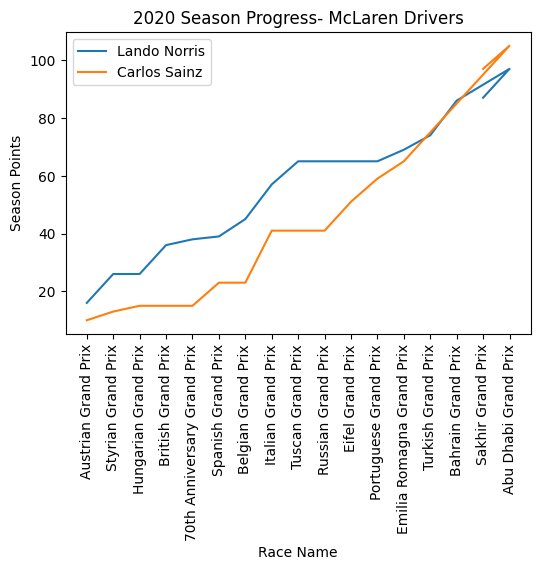

In [70]:
fig, ax = plt.subplots(dpi=100)
for driver in df_results_2020_mclaren['full_name'].unique():
    df_driver_team = df_results_2020_mclaren[df_results_2020_mclaren['full_name'] == driver]
    df_driver_team.sort_values(by="raceId")
    
    ax.plot(df_driver_team['raceId'], df_driver_team['total_points'], label=driver)

ax.set_xticks(df_driver_team['raceId'])
ax.set_xticklabels(df_driver_team['race_name'], rotation=90);
ax.set_xlabel("Race Name")
ax.set_ylabel("Season Points")
ax.legend()
ax.set_title("2020 Season Progress- McLaren Drivers");

In [71]:
# analyzing the constructors results
df_constructors_result = pd.read_csv(os.path.join(data_path, "constructor_results.csv"))
df_constructors_standing = pd.read_csv(os.path.join(data_path, "constructor_standings.csv"))

In [72]:
df_constructors_result.head()

,constructorResultsId,raceId,constructorId,points,status
0,1,18,1,14.0,\N
1,2,18,2,8.0,\N
2,3,18,3,9.0,\N
3,4,18,4,5.0,\N
4,5,18,5,2.0,\N


In [73]:
df_constructors_standing.head()

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins
0,1,18,1,14.0,1,1,1
1,2,18,2,8.0,3,3,0
2,3,18,3,9.0,2,2,0
3,4,18,4,5.0,4,4,0
4,5,18,5,2.0,5,5,0


In [74]:
# use constructor standing
# merge race name, constructor(team) name
df_constructors_standing = df_constructors_standing.merge(df_constructors[['constructorId', 'name']], on='constructorId')
df_constructors_standing = df_constructors_standing.merge(df_races[["raceId", "name", "year"]], on="raceId")

In [75]:
df_constructors_standing.head()

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins,name_x,name_y,year
0,1,18,1,14.0,1,1,1,McLaren,Australian Grand Prix,2008
1,2,18,2,8.0,3,3,0,BMW Sauber,Australian Grand Prix,2008
2,3,18,3,9.0,2,2,0,Williams,Australian Grand Prix,2008
3,4,18,4,5.0,4,4,0,Renault,Australian Grand Prix,2008
4,5,18,5,2.0,5,5,0,Toro Rosso,Australian Grand Prix,2008


In [76]:
df_constructors_standing.rename(columns={"name_x": "constructor_name", "name_y": "race_name"}, inplace=True)

In [77]:
# get performance for Ferrari from 2016-2021 (last 5 years)
df_ferrari = df_constructors_standing[df_constructors_standing['constructor_name'] == 'Ferrari']

In [78]:
df_ferrari_5years = df_ferrari[df_ferrari['year'].isin(list(range(2016, 2022)))]

In [79]:
df_ferrari_5years[df_ferrari_5years['year']==2016]

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins,constructor_name,race_name,year
9903,26558,948,6,15.0,2,2,0,Ferrari,Australian Grand Prix,2016
9914,26448,949,6,33.0,2,2,0,Ferrari,Bahrain Grand Prix,2016
9925,26459,950,6,61.0,2,2,0,Ferrari,Chinese Grand Prix,2016
9936,26470,951,6,76.0,2,2,0,Ferrari,Russian Grand Prix,2016
9947,26481,952,6,109.0,2,2,0,Ferrari,Spanish Grand Prix,2016
9958,26492,953,6,121.0,2,2,0,Ferrari,Monaco Grand Prix,2016
9969,26503,954,6,147.0,2,2,0,Ferrari,Canadian Grand Prix,2016
9980,26525,955,6,177.0,2,2,0,Ferrari,European Grand Prix,2016
9991,26536,956,6,192.0,2,2,0,Ferrari,Austrian Grand Prix,2016
10002,26547,957,6,204.0,2,2,0,Ferrari,British Grand Prix,2016


In [80]:
df_constructors_result = df_constructors_result.merge(df_constructors[['constructorId', 'name']], on='constructorId')
df_constructors_result = df_constructors_result.merge(df_races[["raceId", "name", "year"]], on="raceId")

In [81]:
df_constructors_result.head()

,constructorResultsId,raceId,constructorId,points,status,name_x,name_y,year
0,1,18,1,14.0,\N,McLaren,Australian Grand Prix,2008
1,2,18,2,8.0,\N,BMW Sauber,Australian Grand Prix,2008
2,3,18,3,9.0,\N,Williams,Australian Grand Prix,2008
3,4,18,4,5.0,\N,Renault,Australian Grand Prix,2008
4,5,18,5,2.0,\N,Toro Rosso,Australian Grand Prix,2008


In [82]:
df_constructors_result.rename(columns={"name_x": "constructor_name", "name_y": "race_name"}, inplace=True)

In [83]:
# get performance for Ferrari from 2016-2021 (last 5 years)
df_ferrari = df_constructors_result[df_constructors_result['constructor_name'] == 'Ferrari']
df_ferrari_5years = df_ferrari[df_ferrari['year'].isin(list(range(2016, 2022)))]

In [84]:
df_ferrari_5years_points = df_ferrari_5years.groupby("year")["points"].sum()

In [85]:
year = []
points = []
for k, v in df_ferrari_5years_points.items():
    year.append(k)
    points.append(v)

Text(0, 0.5, 'Constructor Points')

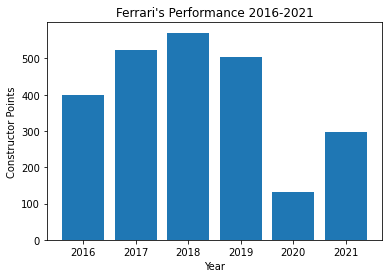

In [86]:
plt.bar(year, points)
plt.title("Ferrari's Performance 2016-2021")
plt.xlabel("Year")
plt.ylabel("Constructor Points")

# it was found that constructor standings had the points added after every race
# constructors results had the points gained during each race, which was then added up 
# to get total points for a season

In [87]:
# exploring qualifying.csv and pit_stops.csv
df_qualifying = pd.read_csv(os.path.join(data_path, "qualifying.csv"))
df_pit_stops = pd.read_csv(os.path.join(data_path, "pit_stops.csv")) 

In [88]:
df_pit_stops.head()

,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842


In [89]:
df_qualifying.head()

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236


In [90]:
# get lap times for Lewis Hamilton at the Australian Grand Prix for Q1-Q3 for years 2015-2019
# merge race name, driver name with qualifying
df_qualifying = df_qualifying.merge(df_races[["raceId", "name", "year"]], on="raceId")
df_qualifying = df_qualifying.merge(df_drivers[["driverId", "full_name"]], on="driverId")

In [91]:
df_qualifying.head()

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3,name,year,full_name
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714,Australian Grand Prix,2008,Lewis Hamilton
1,26,19,1,1,22,4,1:35.392,1:34.627,1:36.709,Malaysian Grand Prix,2008,Lewis Hamilton
2,47,20,1,1,22,3,1:32.750,1:31.922,1:33.292,Bahrain Grand Prix,2008,Lewis Hamilton
3,71,21,1,1,22,5,1:21.366,1:20.825,1:22.096,Spanish Grand Prix,2008,Lewis Hamilton
4,91,22,1,1,22,3,1:26.192,1:26.477,1:27.923,Turkish Grand Prix,2008,Lewis Hamilton


In [92]:
# filter out australian grand prix
df_qualifying_au = df_qualifying[df_qualifying['name'] == 'Australian Grand Prix']

#filter out years 2015-2019
df_qualifying_au = df_qualifying_au[df_qualifying_au['year'].isin(list(range(2015,2020)))]

In [93]:
df_qualifying_au_hamilton = df_qualifying_au[df_qualifying_au['full_name'] == "Lewis Hamilton"]

In [94]:
df_qualifying_au_hamilton.head()

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3,name,year,full_name
148,6309,926,1,131,44,1,1:28.586,1:26.894,1:26.327,Australian Grand Prix,2015,Lewis Hamilton
167,6683,948,1,131,44,1,1:25.351,1:24.605,1:23.837,Australian Grand Prix,2016,Lewis Hamilton
188,7140,969,1,131,44,1,1:24.191,1:23.251,1:22.188,Australian Grand Prix,2017,Lewis Hamilton
208,7540,989,1,131,44,1,1:22.824,1:22.051,1:21.164,Australian Grand Prix,2018,Lewis Hamilton
229,7960,1010,1,131,44,1,1:22.043,1:21.014,1:20.486,Australian Grand Prix,2019,Lewis Hamilton


In [95]:
df_qualifying_au_hamilton['q1'] = df_qualifying_au_hamilton['q1'].apply(lambda x: datetime.strptime(x, '%M:%S.%f'))
df_qualifying_au_hamilton['q2'] = df_qualifying_au_hamilton['q2'].apply(lambda x: datetime.strptime(x, '%M:%S.%f'))
df_qualifying_au_hamilton['q3'] = df_qualifying_au_hamilton['q3'].apply(lambda x: datetime.strptime(x, '%M:%S.%f'))

/var/folders/zm/vm_95yhn3gv76x8lddzxy74h0000gn/T/ipykernel_79594/4115916302.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_qualifying_au_hamilton['q1'] = df_qualifying_au_hamilton['q1'].apply(lambda x: datetime.strptime(x, '%M:%S.%f'))
/var/folders/zm/vm_95yhn3gv76x8lddzxy74h0000gn/T/ipykernel_79594/4115916302.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_qualifying_au_hamilton['q2'] = df_qualifying_au_hamilton['q2'].apply(lambda x: datetime.strptime(x, '%M:%S.%f'))
/var/folders/zm/vm_95yhn

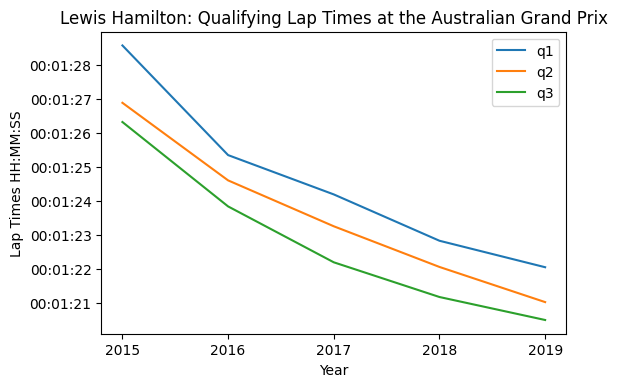

In [96]:
# create bar chart
fig, ax = plt.subplots(dpi=100)
ax.plot(df_qualifying_au_hamilton['year'], df_qualifying_au_hamilton['q1'], label='q1')
ax.plot(df_qualifying_au_hamilton['year'], df_qualifying_au_hamilton['q2'], label='q2')
ax.plot(df_qualifying_au_hamilton['year'], df_qualifying_au_hamilton['q3'], label='q3')
ax.set_xticks(df_qualifying_au_hamilton['year']);
ax.set_xlabel("Year")
ax.set_ylabel("Lap Times HH:MM:SS")
ax.set_title("Lewis Hamilton: Qualifying Lap Times at the Australian Grand Prix")
ax.legend();